# 다중 회귀 
- 다중의 독립 변수가 존재하는 회귀 분석 
- 여러 개의 독립 변수가 복합적으로 종속 변수에 영향을 미치는 경우 다중 회귀 모형으로 데이터를 예측
- 다중 회귀에서 최적의 모델을 결정하기 위해 여러 가지의 방법이 존재 
- 모델이 복잡해지면 과대적합이 발생할 가능성이 있기 때문에 이를 방지하기 위해 다양한 규제 방식이 존재하고 규제에 따른 모델들이 존재 
    - 모델에서 규제 방식에 따라서 가중치를 제한
    - 독립 변수에서의 가중치가 0이 되는 차원(컬럼 | 피쳐)들이 생성 
    - 규제를 강하게 걸면 가중치의 절대치가 줄어들고 0에 가까워진다. 

## 릿지 
- 최소제곱 적합식의 수축 패널티라 불리는 항에 L2 패널티를 추가한것 

- 매개변수 
    - alpha
        - 기본값 : 1.0
        - 규제의 강도 -> 클수록 회귀 계수가 작아지고 과적합의 방지, 과소적합 위험
        - 해당 모델의 중요한 매개변수
    - solver
        - 기본값 : 'auto'
        - 해를 구하는 방법 
        - 데이터의 크기 / 희소성에 따라 적합한 solver를 선택 
        - 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'
            - svd : 특이값 분해, 다중공선성 있고 데이터의 개수가 작거나 중간 정도 
            - cholesky : 정규방정식, 데이터의 개수가 작거나 중간 정도 
            - lsqr : 반복 최소제곱, 대규모 데이터중 희소/밀집 데이터
            - sparse_cg : 공액 기울기법, 대규모 데이터 중 희소 데이터 
            - sag : 확률적 평균 검사, 데이터의 행의 수가 열의 수보다 월등히 많은 경우
            - saga : sag 확장, 대규모 희소, ElasticNet 가능
    - tol
        - 기본값 : 0.001 (1e-03)
        - 수렴의 판단 기준, 작을수록 정밀, 속도적인 면에서 느려질수 있다. 
    - max_iter
        - 기본값 : None
        - 최적화 될때까지 최대 반복 횟수.(데이터 크거나 수치가 불안정 경우에 필요)
    
- 속성 
    - coef_
        - 회귀 계수를 출력 (규제로 인해서 선형 회귀에 비해 값들이 작게 출력)
    - n_iter_
        - solver가 반복한 횟수 출력 


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [ ]:
diabetes = load_diabetes()

In [ ]:
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
df.head()

In [ ]:
alpha = np.logspace(-3, 1, 5)
alpha

In [ ]:
# alpha 값에 따라 회귀계수가 어떻게 변화하는가?
# 반복 실행할때 마다 회귀계수를 추가해주는 빈 리스트 
data = []

for a in alpha:
    # print(a)
    # Ridge class 생성 시 alpha 매개변수에 a를 대입
    ridge = Ridge(alpha=a)
    # 모델 학습 
    ridge.fit(df.values, diabetes['target'])
    # 학습 된 모델에서 회귀계수를 출력하여 data에 추가 
    data.append(
        ridge.coef_
    )
data

In [ ]:
df_ridge =  pd.DataFrame(data, index = alpha, columns = df.columns)

In [ ]:
plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.xlabel(alpha)
plt.ylabel('coef')
plt.axhline(y = 0, color='black', linewidth = 3)

plt.show()

In [ ]:
# 단순 선형 회귀와 릿지 회귀 의 회귀 계수를 확인 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(
    df.values, 
    diabetes['target']
)

In [ ]:
plt.figure(figsize=(16,8))
plt.axhline(y = 0, linestyle = '--', linewidth = 3, color = 'black')
plt.plot(df_ridge.loc[0.001, ], '^-')
plt.plot(df_ridge.loc[0.01, ], 's')
plt.plot(df_ridge.loc[0.1], 'v')
plt.plot(df_ridge.loc[1.0], '*')
plt.plot(df_ridge.loc[10.0], 'o-')
plt.plot(lr.coef_, 'r', linewidth=3, alpha=0.5)
plt.legend( ['cneter', 0.001, 0.01, 0.1, 1, 10, 'linear'], bbox_to_anchor=(1, 1))
plt.show()

- 연습 
    - train과 test의 비율은 8:2로 분할
    - 당뇨 데이터를 이용하여 단순 선형 회귀를 이용하여 학습, 평가를 하여 평가 지표 mse값을 확인하고 
    - 릿지 회귀를 이용하여 alpha 0.01, 0.1, 1 인 경우로 학습, 평가를 하여 평가 지표 mse값을 확인하여 비교 

In [ ]:
# 독립변수, 종속변수 각각 x, y에 대입
x = df.values
y = diabetes['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 독립 변수, 종속 변수 데이터를 train, test로 8:2의 비율이 나눠준다. 
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size= 0.2 , random_state=42
)

In [ ]:
# 단순 선형 회귀 class를 생성 
lr = LinearRegression()

In [ ]:
# 학습 데이터를 이용하여 모델의 학습
lr.fit(X_train, Y_train)

In [ ]:
# 평가 지표를 확인하기 위해 metrics 안에 있는 mse, r2score 로드
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# alpha 값에 따라 모델을 여러개 생성
ridge_1 = Ridge(alpha=0.01)
ridge_2 = Ridge(alpha=0.1)
ridge_3 = Ridge(alpha=1)

In [ ]:
# 생성된 모델에 학습 데이터를 대입하여 학습
ridge_1.fit(X_train, Y_train)
ridge_2.fit(X_train, Y_train)
ridge_3.fit(X_train, Y_train)

In [ ]:
# 학습한 모델들을 이용하여 예측용 독립 변수를 대입하여 예측 값을 저장 
lr_pred = lr.predict(X_test)
ridge_1_pred = ridge_1.predict(X_test)
ridge_2_pred = ridge_2.predict(X_test)
ridge_3_pred = ridge_3.predict(X_test)

In [ ]:
# MSE -> 오차를 제곱하여 평균을 낸 평가 지표
mse_lr = mean_squared_error(Y_test, lr_pred)
mse_ridge_1 = mean_squared_error(Y_test, ridge_1_pred)
mse_ridge_2 = mean_squared_error(Y_test, ridge_2_pred)
mse_ridge_3 = mean_squared_error(Y_test, ridge_3_pred)

In [ ]:
print(round(mse_lr, 2))
print(round(mse_ridge_1, 2))
print(round(mse_ridge_2, 2))
print(round(mse_ridge_3, 2))

In [ ]:
r2_lr = r2_score(Y_test, lr_pred)
r2_ridge_1 = r2_score(Y_test, ridge_1_pred)
r2_ridge_2 = r2_score(Y_test, ridge_2_pred)
r2_ridge_3 = r2_score(Y_test, ridge_3_pred)

In [ ]:
print(round(r2_lr, 4))
print(round(r2_ridge_1, 4))
print(round(r2_ridge_2, 4))
print(round(r2_ridge_3, 4))

In [ ]:
# X_test의 첫번째 인덱스의 값
X_test[0]
# 선형 회귀 계수
lr.coef_
# 절편
lr.intercept_

In [ ]:
lr_pred[0]

In [ ]:
# 절편 값을 저장
pred_1 = lr.intercept_
for w, x in zip(lr.coef_, X_test[0]):
    # pred_1에 w와 x를 곱한 값을 누적합 
    pred_1 += (w * x)

pred_1

## 라쏘
- 최소 제곱 적합식의 수축 패널티라 불리는 항에 L1 패널티를 추가한 것 
- 릿지 회귀가 변수의 크기가 매우 큰 데이터인 경우에는 결과를 해석하는데 어려움 발생하는데 이러한 문제를 해결하기위한 방법 

- 매개변수 
    - alpha
        - 기본값 : 1.0 
        - 규제 강도. 클수록 많은 회귀 계수가 0이 되어 변수 선택(feature select)
        - 규제의 강도가 너무 큰 경우에는 많은 컬럼의 회귀 계수가 0이 되어 단순한 데이터(과소적합)
    - seletion
        - 기본값 : 'cyclic'
        - 좌표축 경사법 업데이트의 순서 
            - cyclic : 순차적으로 업데이트
            - random : 무작위 선택 업데이트 
        - 피쳐의 순서대로 가중치를 적용할것인가? 아니면 무작위 선택으로 가중치를 적용할 것인가?
    - percompute
        - 기본값 : auto
        - Gram matrix의 미리 계산의 여부
        - 그람 행렬은 선형 대수에서 자주 쓰이는 개념
        - 회귀 분석에서 핵심적인 부분 
    - warm_start
        - 기본값 : False
        - 이전의 학습 결과를 이어서 학습을 할지 지정 

In [ ]:
from sklearn.linear_model import Lasso

In [88]:
# alpha의 범위를 하나 지정 
alpha = np.logspace(-3, 1, 5)
# 모델이 학습을 하고 생성된 회귀 계수를 추가하는 공간인 빈 리스트 생성 
data = []

for a in alpha:
    # print(a)
    lasso = Lasso(alpha = a)
    # 모델 학습 
    lasso.fit(df.values, diabetes['target'])
    data.append(lasso.coef_)

lasso_df = pd.DataFrame(data, index=alpha, columns = df.columns)
lasso_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


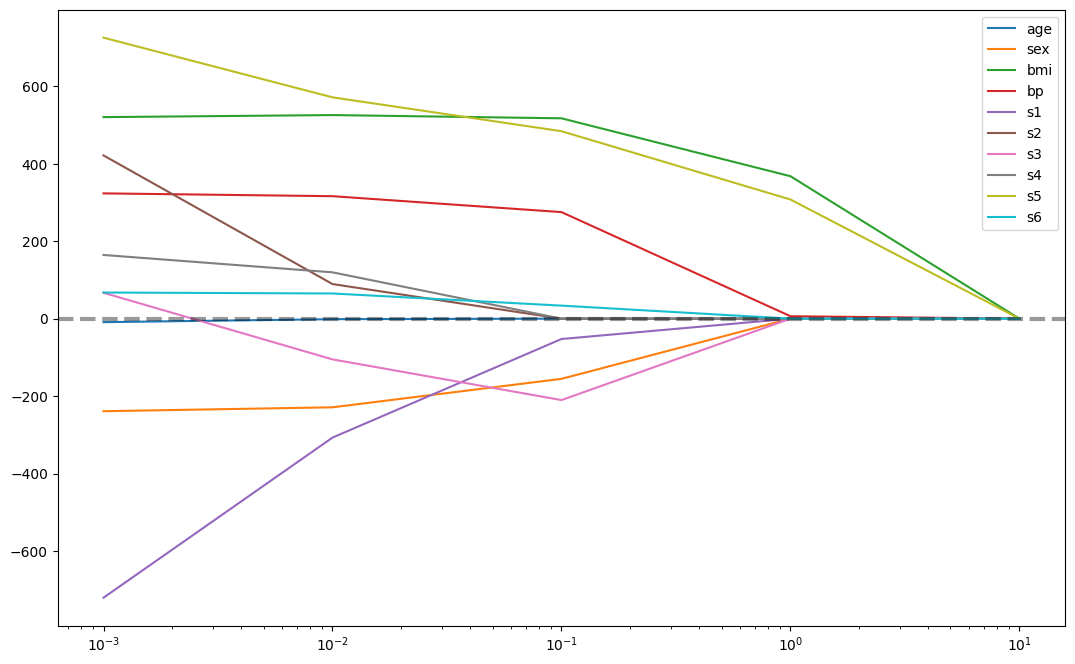

In [89]:
# 회귀 계수를 그래프 시각화
plt.figure(figsize=(13,8))
plt.semilogx(lasso_df)
# y = 0 보조선 추가 
plt.axhline(y = 0, linestyle = '--', color = 'black', linewidth=3, alpha=0.4)
plt.legend(labels = lasso_df.columns, bbox_to_anchor=(1,1))

plt.show()

In [ ]:
lr = LinearRegression()
lr.fit(df.values, diabetes['target'])

In [ ]:
plt.figure(figsize=(14, 8))

plt.axhline(y = 0, linestyle='--', linewidth = 3, alpha = 0.3)
plt.plot(lasso_df.loc[0.001, ], '^-', label ='Lasso 0.001')
plt.plot(lasso_df.loc[0.01, ], 's', label = 'Lasso 0.01')
plt.plot(lasso_df.loc[0.1, ], 'v', label = 'Lasso 0.1')
plt.plot(lasso_df.loc[1.0, ], '*', label ='Lasso 1.0')
plt.plot(lr.coef_, 'r', linewidth=3, alpha = 0.3, label='Linear')

plt.legend()

plt.show()

- 연습 
    - train, test  75:25 비율로 생성
    - 단순 선형 회귀, Lasso 모델을 이용하여 당뇨병 데이터 학습을 시키고 평가를 하여 평가 지표를 하나 생성 
        - Lasso Alpha는 0.01, 0.1 2개의 모델을 생성 
    - mse, r2_score의 값들을 비교 

In [ ]:
x = df.values
y = diabetes['target']

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 독립, 종속 변수를 데이터 분할 
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size= 0.25, random_state=42
)

In [ ]:
# 모델을 생성 
lr = LinearRegression()
lasso1 = Lasso(alpha=0.01)
lasso2 = Lasso(alpha=0.1)
lasso3 = Lasso(alpha=1)

In [ ]:
# 모델에 데이터를 학습 
lr.fit(X_train, Y_train)
lasso1.fit(X_train, Y_train)
lasso2.fit(X_train, Y_train)
lasso3.fit(X_train, Y_train)

In [ ]:
# 학습된 모델을 이용하여 예측
pred_lr = lr.predict(X_test)
pred_lasso1 = lasso1.predict(X_test)
pred_lasso2 = lasso2.predict(X_test)
pred_lasso3 = lasso3.predict(X_test)

In [ ]:
# 평가 지표 mse 생성 
mse_lr = mean_squared_error(Y_test, pred_lr)
mse_lasso1 = mean_squared_error(Y_test, pred_lasso1)
mse_lasso2 = mean_squared_error(Y_test, pred_lasso2)
mse_lasso3 = mean_squared_error(Y_test, pred_lasso3)

In [ ]:
print(round(mse_lr, 4))
print(round(mse_lasso1, 4))
print(round(mse_lasso2, 4))
print(round(mse_lasso3, 4))

In [ ]:
r2_lr = r2_score(Y_test, pred_lr)
r2_lasso1 = r2_score(Y_test, pred_lasso1)
r2_lasso2 = r2_score(Y_test, pred_lasso2)
r2_lasso3 = r2_score(Y_test, pred_lasso3)

In [ ]:
print(round(r2_lr, 4))
print(round(r2_lasso1, 4))
print(round(r2_lasso2, 4))
print(round(r2_lasso3, 4))

## 엘라스틱넷
- 릿지 회귀, 라쏘 회귀를 절충한 알고리즘
- L1, L2 패널티를 혼합 -> 혼합의 비율을 지정

- 매개변수 
    - alpha 
        - 기본값 : 1
        - 전체 규제의 강도 
    - l1_ratio
        - 기본값 : 0.5
        - L1 패널티의 비중 
        - 0 : 릿지 회귀
        - 1 : 라쏘 회귀 
        - 0과 1사이의 값 : 엘라스틱넷
- 라쏘가 과도하게 변수를 제거하거나 릿지가 과적합을 충분하게 억제 하지 못하는 경우에 중간의 타협안으로 사용 

In [ ]:
from sklearn.linear_model import ElasticNet

In [90]:
alpha = np.logspace(-3, 1, 5)

data = []

for a in alpha:
    ela = ElasticNet(alpha = a)
    ela.fit(x, y)
    data.append(ela.coef_)

ela_df = pd.DataFrame(data, index=alpha, columns=df.columns)
ela_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


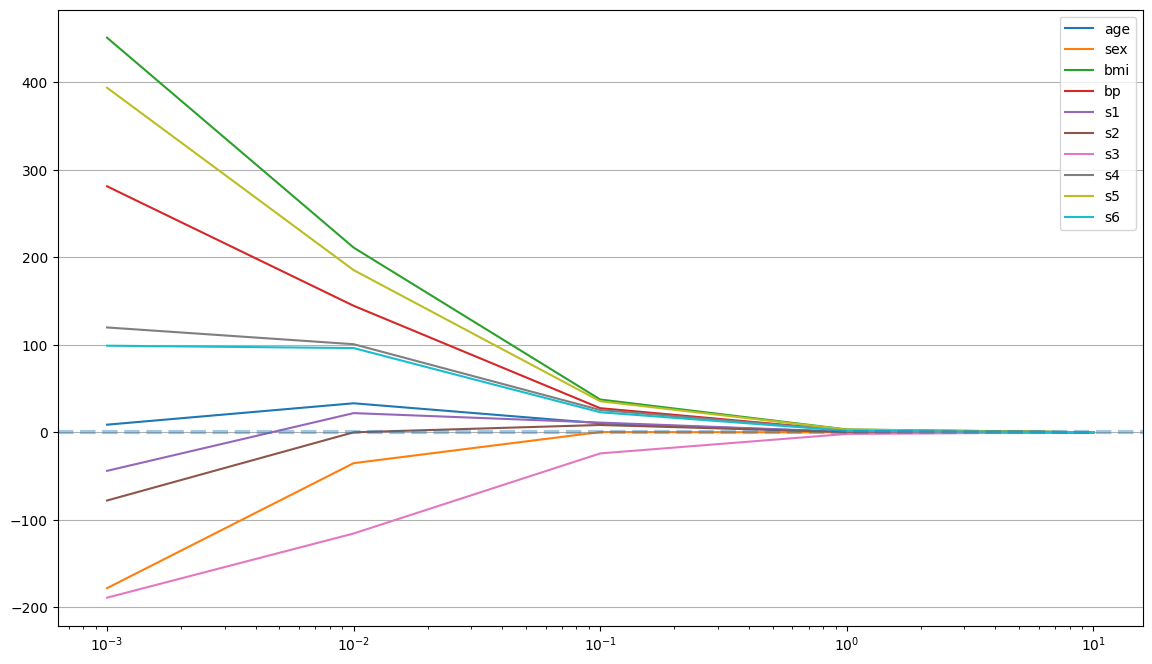

In [87]:
# 회귀 계수를 그래프 시각화 
plt.figure(figsize=(14, 8))
plt.semilogx(ela_df)

plt.legend(labels = ela_df.columns, bbox_to_anchor=(1,1))

plt.axhline(y = 0, linestyle='--', linewidth=3, alpha=0.4)
plt.grid(axis='y')

plt.show()

In [91]:
# 엘라스틱넷의 alpha에 따라서 실제 모델의 성능을 확인 
ela1 = ElasticNet(alpha=0.01)
ela2 = ElasticNet(alpha=0.1)
ela3 = ElasticNet(alpha=1)

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [93]:
ela1.fit(X_train, Y_train)
ela2.fit(X_train, Y_train)
ela3.fit(X_train, Y_train)

,alpha,1
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [94]:
pred_ela1 = ela1.predict(X_test)
pred_ela2 = ela2.predict(X_test)
pred_ela3 = ela3.predict(X_test)

In [96]:
mse_ela1 = mean_squared_error(Y_test, pred_ela1)
mse_ela2 = mean_squared_error(Y_test, pred_ela2)
mse_ela3 = mean_squared_error(Y_test, pred_ela3)

In [98]:
print(round(mse_ela1, 4))
print(round(mse_ela2, 4))
print(round(mse_ela3, 4))

3318.5057
4775.4668
5311.2128
